In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

# Run a population to find a potential X-ray binary
First let's make a population and try to get a source that has a star transferring mass onto a compact object at some point.

In [88]:
# keep making populations until we get at least one XRB
xrb_nums = []
while len(xrb_nums) == 0:
    # preferentially sample higher mass stars to get compact objects
    p = cogsworth.pop.Population(500, final_kstar1=[13, 14])

    # we only need the stellar evolution for this case
    p.sample_initial_galaxy()
    p.sample_initial_binaries()
    p.perform_stellar_evolution()

    # find any stars with a compact object where the other star is overflowing its Roche lobe
    xrb_condition = ((p.bpp["kstar_1"].isin([13, 14]) & (p.bpp["RRLO_2"] >= 1)) |
                     (p.bpp["kstar_2"].isin([13, 14]) & (p.bpp["RRLO_1"] >= 1)))
    maybe_xrb_nums = p.bpp[xrb_condition]["bin_num"].unique()
    
    # find the binaries that have experienced a common envelope or merged
    ce_nums = p.bpp[p.bpp["evol_type"] == 7]["bin_num"].unique()
    merged_nums = p.bin_nums[p.final_bpp["sep"] == 0]
    xrb_nums = np.setdiff1d(maybe_xrb_nums, np.union1d(ce_nums, merged_nums))

# Inspect our potential XRB

Now let's take a look at the evolution table for a random one of our XRBs.

In [96]:
random_xrb = np.random.choice(xrb_nums)
p.bpp.loc[random_xrb]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
263,0.000000,61.060832,23.382026,1.0,1.0,200.128182,35.706976,0.184062,0.125184,0.109735,1.0,0.000000,0.000000,4.116795e+00,8.308202e+00,0.000000,0.000000,9.479847,5.369421,61.060832,23.382026,5.061989e+05,6.111750e+04,50228.388845,39341.171826,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.063189e+03,1.941967e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,263
263,4.209808,54.080027,23.213438,2.0,1.0,218.509272,42.579992,0.183623,0.350047,0.128237,2.0,4.362207,4.227763,4.362207e+00,8.371785e+00,21.038594,0.000000,28.323896,7.059483,54.080027,23.213438,9.675690e+05,8.573542e+04,34167.531823,37339.907786,1.475905,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7.871801e+01,1.061072e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.152399,-0.017954,0.0,0.0,263
263,4.210732,54.076034,23.213541,2.0,1.0,178.398500,31.412211,0.000000,1.000999,0.128237,3.0,4.363131,4.228666,4.362207e+00,8.371746e+00,21.135539,0.000000,80.999903,7.060091,54.080027,23.213541,9.859676e+05,8.574519e+04,20299.859241,37339.363729,1.480033,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7.305664e+01,7.305664e+01,0.0,0.0,0.0,0.0,0.0,0.0,-0.152399,-0.017934,0.0,0.0,263
263,4.213817,52.490309,24.776772,4.0,1.0,166.154479,28.238589,0.000000,36.537325,0.136664,2.0,4.366216,3.706898,4.362207e+00,7.826616e+00,21.459321,0.000000,2702.321607,7.179169,54.080027,24.776772,1.049990e+06,9.787790e+04,3570.239447,38273.984150,1.493767,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.049316e+01,5.122529e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.152399,0.506919,0.0,0.0,263
263,4.219320,21.595817,55.640934,4.0,1.0,186.385448,33.556616,0.000000,0.586041,0.114615,4.0,4.371718,0.910656,4.362207e+00,4.300435e+00,21.501806,0.000000,32.845375,9.881321,54.080027,55.640934,1.016314e+06,4.739487e+05,32121.032474,48394.381624,1.497582,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.010866e+01,4.741240e+03,0.0,0.0,0.0,0.0,0.0,0.0,-0.152399,3.308664,0.0,0.0,263
263,4.225866,21.552308,55.651650,7.0,1.0,186.355744,33.555719,0.000000,0.026821,0.114686,2.0,0.011283,0.917116,4.078658e-01,4.300026e+00,0.000000,0.000000,1.502114,9.890035,21.552308,55.651650,5.526618e+05,4.745721e+05,128983.177758,48388.955608,0.000000,0.000000,2.155231e+01,1.000000e-10,1.502114e+00,1.000000e-10,9.187213e-04,4.728066e+03,0.0,0.0,0.0,0.0,0.0,0.0,4.214584,3.308751,0.0,0.0,263
263,4.645490,17.377970,55.271813,8.0,1.0,198.036582,37.894234,0.000000,0.023315,0.109112,2.0,0.459446,1.340585,4.594456e-01,4.314639e+00,12.979723,0.000000,1.313863,10.398651,17.377970,55.271813,5.554204e+05,4.989731e+05,138086.143106,47785.969866,0.000070,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.872214e-01,4.051356e+03,0.0,0.0,0.0,0.0,0.0,0.0,4.186044,3.304905,0.0,0.0,263
263,4.647772,17.355472,55.269608,8.0,1.0,198.103941,37.920017,0.000000,0.023315,0.109112,15.0,0.461615,1.342779,4.594456e-01,4.314720e+00,13.077931,0.000000,1.324489,10.401606,17.377970,55.269608,5.767530e+05,4.991085e+05,138833.070412,47782.421999,0.000070,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.178264e+07,4.047840e+03,0.0,0.0,0.0,0.0,0.0,0.0,4.186044,3.304879,0.0,0.0,263
263,4.647772,16.855472,55.269608,14.0,1.0,199.486864,38.450364,0.006932,0.000001,0.108500,2.0,0.000000,1.342894,4.594456e-01,4.314724e+00,16.855472,0.000000,0.000071,10.401761,17.377970,55.269608,1.000000e-10,4.991156e+05,2168.783633,47782.236298,0.000071,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.178264e+07,4.047656e+03,0.0,0.0,0.0,0.0,0.0,0.0,4.647772,3.304879,0.0,0.0,263
263,7.680302,16.855528,50.506163,14.0,2.0,213.626045,44.090697,0.006944,0.000001,0.261387,2.0,3.032530,4.52

That's a lot of numbers, let's use ``cogsworth`` to turn this into a plot to make things easier.

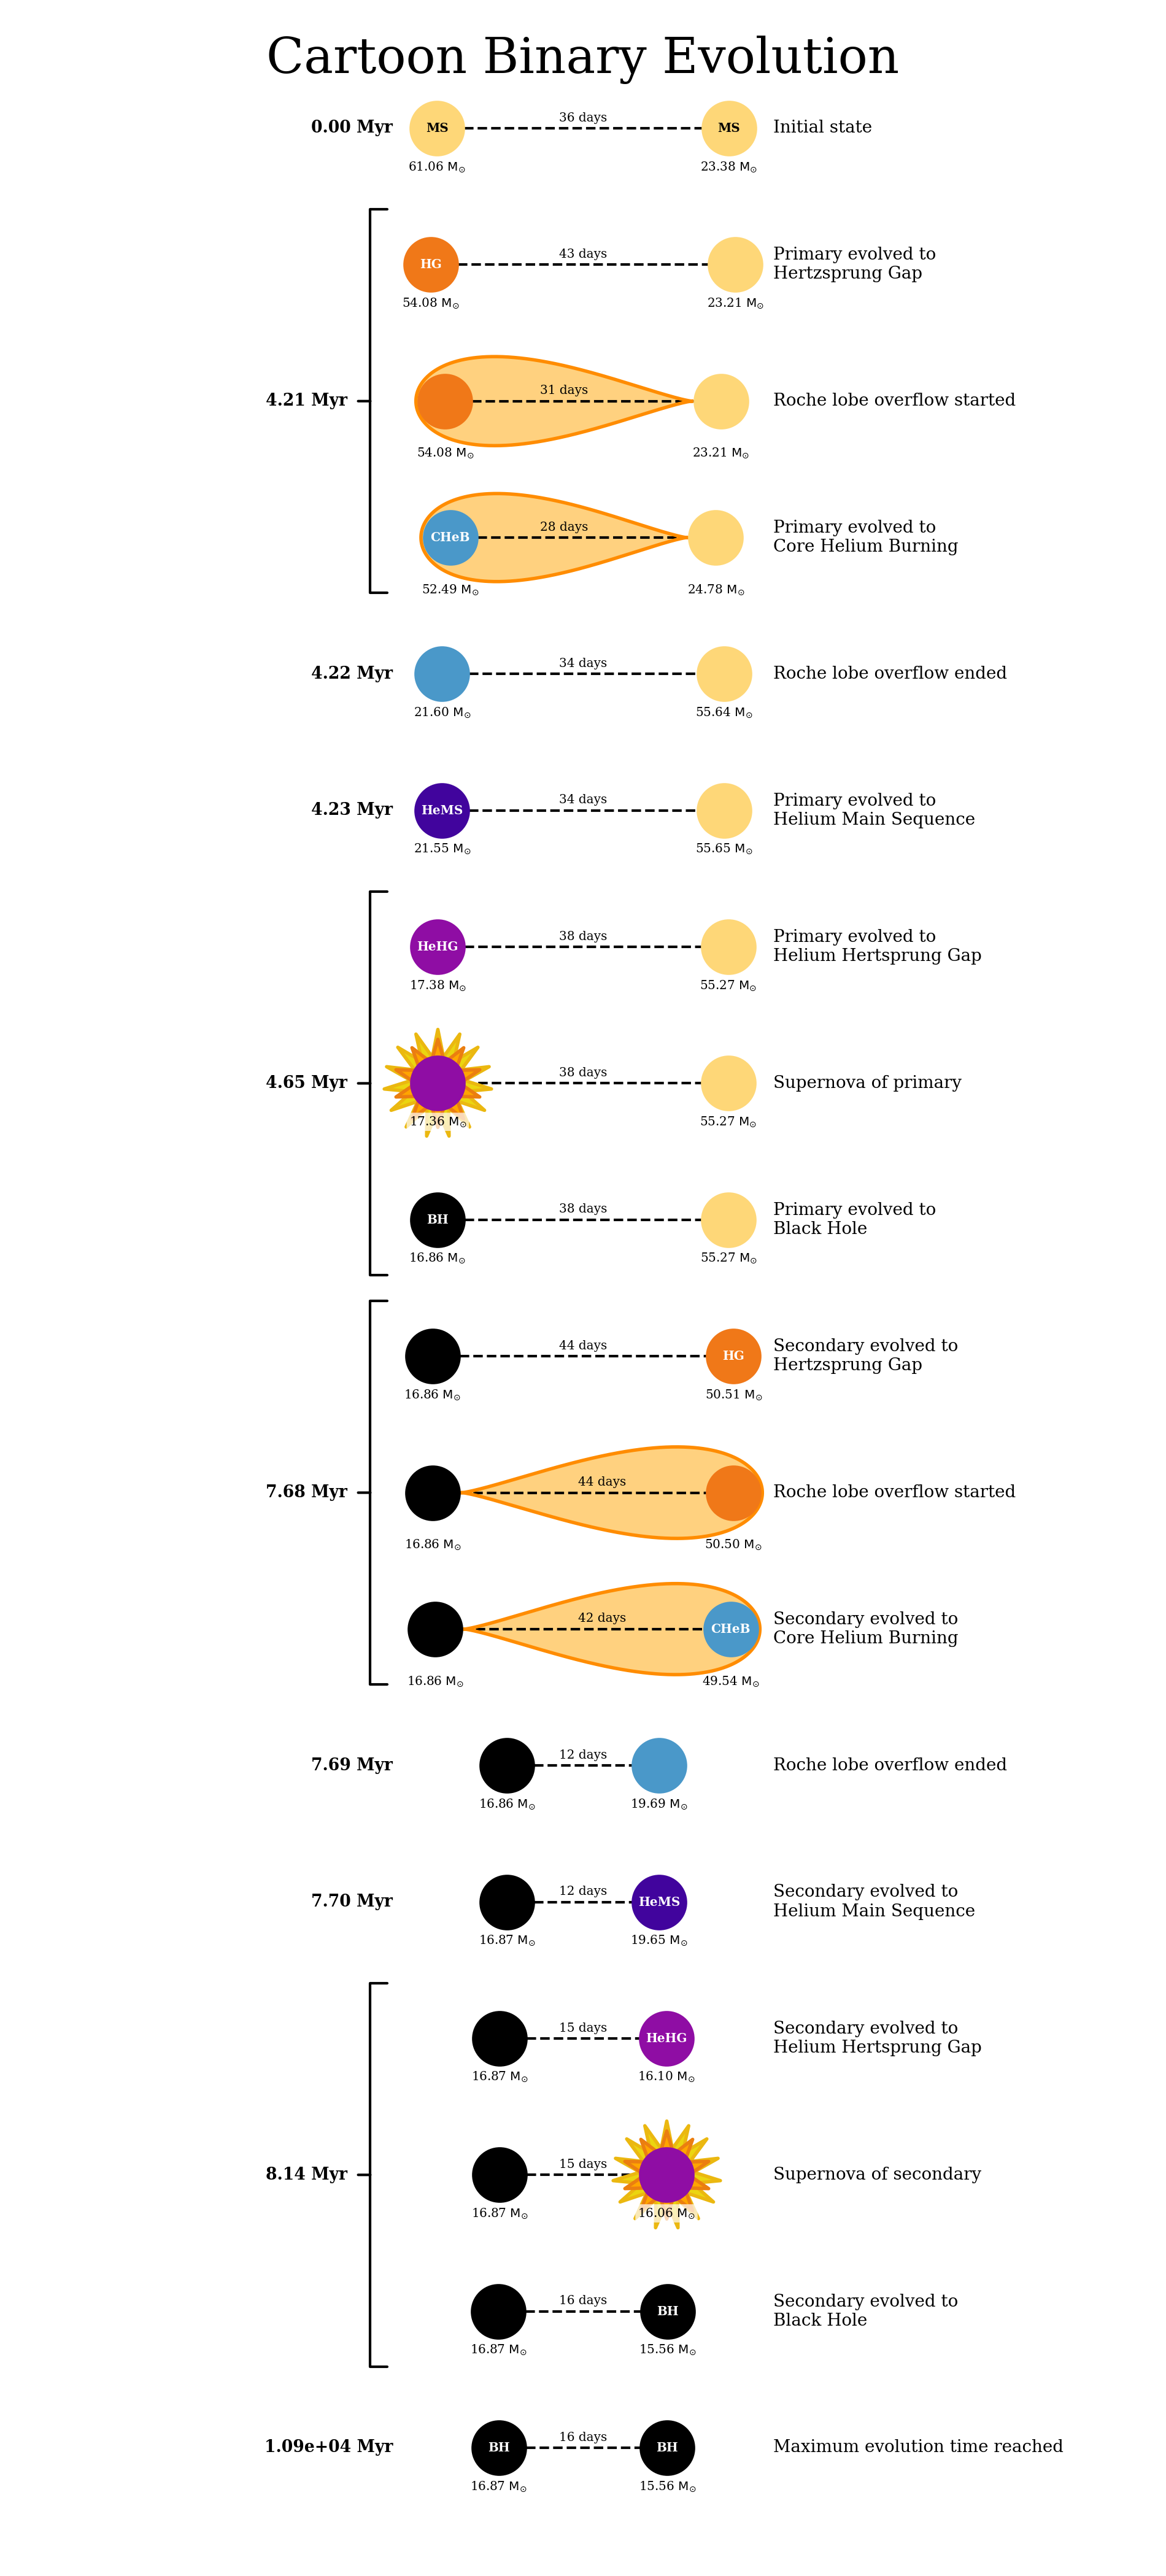

(<Figure size 1200x2700 with 1 Axes>, <Axes: >)

In [97]:
p.plot_cartoon_binary(random_xrb)

# Re-run for more detail

Okay so we can see that this random binary had some mass transfer onto a compact object, but what was the mass transfer rate over time? Exactly how long did it last? We can't really see that currently. Luckily ``COSMIC`` makes it very easy to re-run this binary with more detail.

To start let's make a population with this binary all by itself.

In [98]:
xrb = p[int(random_xrb)]

Now let's overwrite the ``bcm_timestep_conditions`` for this population and re-run the stellar evolution.

In [99]:
# these conditions say "one star is a NS/BH, the other is a star that is overflowing its Roche lobe"
# they then specify dtp=0.0 which means "give me every timestep you computed"
# you could set this to a value in Myr to get fewer timesteps
xrb.bcm_timestep_conditions = [
    ['kstar_1>=13', 'kstar_2<10', 'RRLO_2>=1', 'dtp=0.0'],
    ['kstar_2>=13', 'kstar_1<10', 'RRLO_1>=1', 'dtp=0.0'],
]
xrb.perform_stellar_evolution()

And with that done we now have a new ``p.bcm`` table that includes all of the details of the mass transfer onto the black hole

In [117]:
xrb.bcm

,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,renv_1,epoch_1,omega_spin_1,deltam_1,RRLO_1,kstar_2,mass0_2,mass_2,lum_2,rad_2,teff_2,massc_2,radc_2,menv_2,renv_2,epoch_2,omega_spin_2,deltam_2,RRLO_2,porb,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num
0,0.000000,1.0,61.060832,61.060832,5.061989e+05,9.479847,50228.388845,0.000000,0.000000,1.000000e-10,1.000000e-10,0.000000,1.063189e+03,0.000000e+00,0.125184,1.0,23.382026,23.382026,6.111750e+04,5.369421,39341.171826,0.000000,0.000000,1.000000e-10,1.000000e-10,0.000000,1.941967e+03,0.000000,0.109735,35.706976,200.128182,0.184062,0.0,0.0,0.0,0.0,0,-001,0
0,7.681637,14.0,17.377970,16.855676,1.000000e-10,0.000071,2168.770461,16.855676,0.000071,1.000000e-10,1.000000e-10,4.647772,2.638813e+09,0.000000e+00,0.000001,2.0,50.506163,50.500894,8.708509e+05,101.077061,17616.890852,19.301497,1.400568,1.000000e-10,1.000000e-10,3.157869,5.260409e+01,0.000000,1.001200,43.625328,212.114825,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.681637,14.0,17.377970,16.855676,1.000000e-10,0.000071,2168.770461,16.855676,0.000071,1.000000e-10,1.000000e-10,4.647772,2.638852e+09,2.292205e-07,0.000001,2.0,50.506163,50.500894,8.708511e+05,101.077940,17616.815045,19.301498,1.400568,1.000000e-10,1.000000e-10,3.157869,5.273041e+01,-0.000005,1.001209,43.625328,212.114825,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.681637,14.0,17.377970,16.855676,1.000000e-10,0.000071,2168.770461,16.855676,0.000071,1.000000e-10,1.000000e-10,4.647772,2.638930e+09,2.292206e-07,0.000001,2.0,50.506163,50.500894,8.708514e+05,101.079697,17616.663431,19.301499,1.400568,1.000000e-10,1.000000e-10,3.157869,5.273041e+01,-0.000005,1.001226,43.625329,212.114825,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.681637,14.0,17.377970,16.855676,1.000000e-10,0.000071,2168.770461,16.855676,0.000071,1.000000e-10,1.000000e-10,4.647772,2.639087e+09,2.292208e-07,0.000001,2.0,50.506163,50.500894,8.708520e+05,101.083211,17616.360208,19.301503,1.400568,1.000000e-10,1.000000e-10,3.157869,5.273042e+01,-0.000005,1.001261,43.625329,212.114826,0.000000,0.0,0.0,1.0,0.0,0,-001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7.690331,14.0,17.377970,16.862038,1.000000e-10,0.000071,2168.361345,16.862038,0.000071,1.000000e-10,1.000000e-10,4.647772,3.201709e+10,7.413658e-07,0.000003,4.0,50.506163,19.698026,8.970297e+05,40.548188,28021.126529,19.608136,1.416128,1.000000e-10,1.000000e-10,3.157869,1.331100e+01,-0.004191,1.383063,12.376221,74.704412,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.690378,14.0,17.377970,16.862073,1.000000e-10,0.000071,2168.359087,16.862073,0.000071,1.000000e-10,1.000000e-10,4.647772,3.203168e+10,7.413650e-07,0.000003,4.0,50.506163,19.697463,8.962222e+05,38.257498,28841.327933,19.608481,1.416160,1.000000e-10,1.000000e-10,3.157869,1.369068e+01,-0.000012,1.304930,12.376430,74.704893,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.690473,14.0,17.377970,16.862143,1.000000e-10,0.000071,2168.354572,16.862143,0.000071,1.000000e-10,1.000000e-10,4.647772,3.206172e+10,7.413634e-07,0.000003,4.0,50.506163,19.696447,8.946229e+05,34.270060,30459.458815,19.609171,1.416225,1.000000e-10,1.000000e-10,3.157869,1.443899e+01,-0.000011,1.168923,12.376807,74.705767,0.000000,0.0,0.0,1.0,0.0,0,-001,0
0,7.690662,14.0,17.377970,16.862283,1.000000e-10,0.000071,2168.345541,16.862283,0.000071,1.000000e-10,1.000000e-10,4.647772,3.212512e+10,7.413601e-07,0.000003,4.0,50.506163,19.694637,8.913110e+05,27.827528,33770.665400,19.610550,1.416354,1.000000e-10,1.000000e-10,3.157869,1.656491e+01,-0.000010,0.949175,12.377486,74.707361,0.000000,0.0,0.0,1.0,0.0,0,-001,0


# Plotting time!
It's everyone's favourite moment: plotting time! Let's see how the mass of both companions varies during the mass transfer and how the mass transfer efficiency changes.

In [115]:
mt_rows = xrb.bcm[xrb.bcm["RRLO_2"] >= 1]

Text(0.5, 0, 'Time [kyr]')

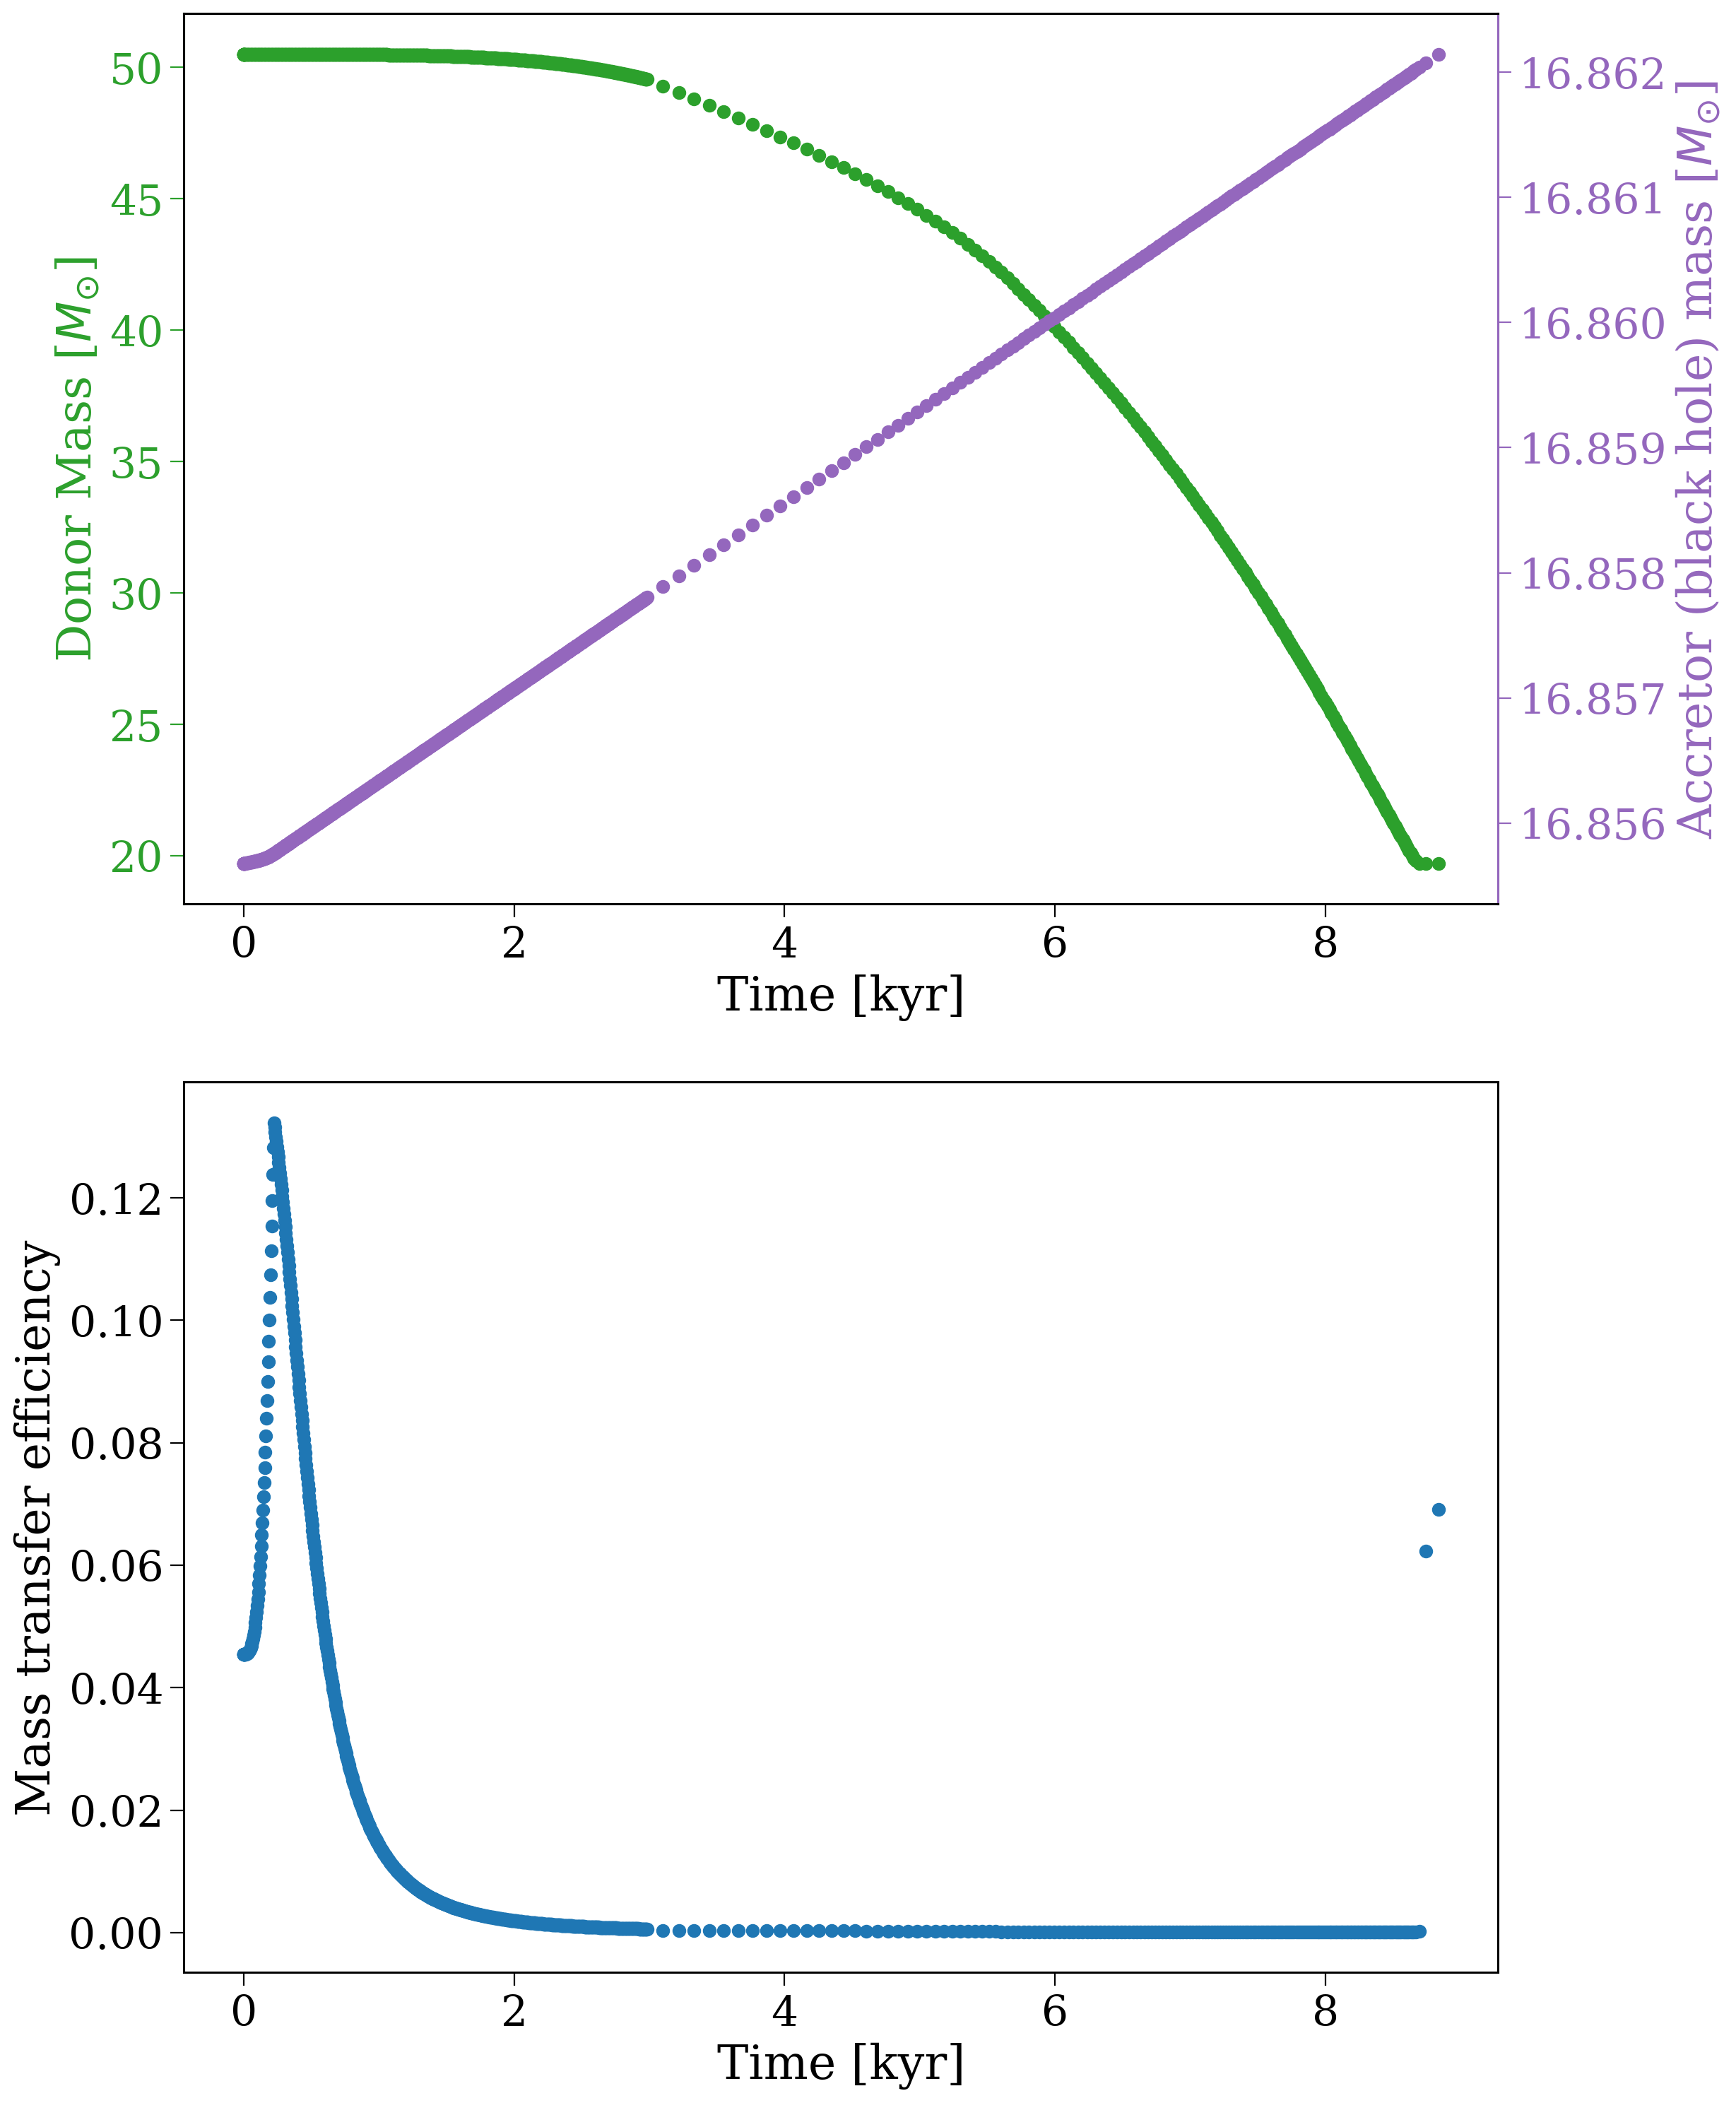

In [116]:
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

mt_time = (mt_rows["tphys"] - mt_rows["tphys"].min()) * 1000

axes[0].scatter(mt_time, mt_rows["mass_2"], color="tab:green")
axes[0].spines["left"].set_color("tab:green")
axes[0].set_ylabel(r"Donor Mass [$M_{\odot}$]", color="tab:green")
axes[0].tick_params(axis="y", colors="tab:green")
axes[0].set_xlabel("Time [kyr]")

right_ax = axes[0].twinx()
right_ax.scatter(mt_time, mt_rows["mass_1"], color="tab:purple")
right_ax.spines["right"].set_color("tab:purple")
right_ax.set_ylabel(r"Accretor (black hole) mass [$M_{\odot}$]", color="tab:purple")
right_ax.tick_params(axis="y", colors="tab:purple")

axes[1].scatter(mt_time, mt_rows["deltam_1"] / -mt_rows["deltam_2"])
axes[1].set_ylabel(r"Mass transfer efficiency")
axes[1].set_xlabel("Time [kyr]")

So you can see that the secondary transfers a **lot** of mass, but the black hole only accretes a very small fraction of it. You could imagine using this information to estimate the X-ray luminosity of the binary during this phase. But I'll leave that as an exercise to the reader ;)

# Wrap-up


And now you know how to re-run your binaries in detail! You might want to try this yourself but for a different subpopulation, with different conditions! Keep reading for more fun ``cogsworth`` tutorials (disclaimer: fun not guaranteed...).